In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dash

# import plotly
import plotly.graph_objects as go
import plotly.express as px

from jupyter_dash import JupyterDash
from dash import dcc, html
from dash import html

from dash.dependencies import Output, Input
from dash.exceptions import PreventUpdate

G3_colour = "#6DA9E4"
G2_colour = "#F7D060"
G1_colour = "#917FB3"
GR_colour = "#98D8AA"
ECD_colour = "#FF6D60"

In [2]:
# uni = pd.read_csv("20230401 - Masi University Main Sheet.csv")
# tl = pd.read_csv("2023 Top Learner  High School - Main -20230120 - NMB High Schools.csv")
children = pd.read_csv("Results By Year/All22.csv").assign(
    full_sessions = lambda x: x["Total Sessions"] > 30
)

## Calculating Improvement Columns

In [4]:
children["Jan - Sounds and Phonics"] =  children["Jan - Sounds First Letter"] + children["Jan - Phonics"]
children["Nov - Sounds and Phonics"] =  children["Nov - Sounds First Letter"] + children["Nov - Phonics"]
children["Sounds and Phonics Improvement"] = children["Nov - Sounds and Phonics"] - children["Jan - Sounds and Phonics"]
children["Jan - Setence Total"] = children["Jan - Sentence 1"] + children["Jan - Sentence 2"]
children["Nov - Sentence Total"] = children["Nov - Sentence 1"] + children["Nov - Sentence 2"]
children["First Sounds Improvement"] = children["Nov - Sounds First Letter"] - children["Jan - Sounds First Letter"]
children["Phonics Improvement"] = children["Nov - Phonics"] - children["Jan - Phonics"]
children["Sight Words Improvement"] = children["Nov - Sight Words"] - children["Jan - Sight Words"]
children["Letters Improvement"] = children["Nov - Letters Correct"] - children["Jan - Letters Correct"]
children["Sentence Improvement"] = children["Nov - Sentence Total"] - children["Jan - Setence Total"]
children["Total Improvement"] = children["Nov - Total"] - children["Jan - Total"]
children['Ever On Programme w Grads'] = children['Ever On Programme'].apply(lambda x: 'Yes' if x == 'Yes' or x == 'Graduated' else 'No')

improvement_columns = ["First Sounds Improvement","Phonics Improvement","Sight Words Improvement", "Letters Improvement", "Sentence Improvement", "Total Improvement" ]

## Creating our Group By Objects (GBOs)
- N.B. I'm using the Grade column to distinguish ECD children vs Primary b/c of the schools that have 'Both'. Might be susceptible to errors, so confirm data is correct.
- Four objects created
    1. Primary School - On Programme
    2. Primary School - Not On Programme
    3. ECD - On Programme
    4. ECD - Not On Programme

In [5]:
# We are excluding our graduates from all of these
on_programme_primary = children[(children['On The Programme EOY'] == "Yes") & (children['Grade'] != "PreR") & (children['Ever On Programme'] != "Graduated")]
on_primary = on_programme_primary.groupby("Schools")
not_programme_primary = children[(children['On The Programme EOY'] == "No") & (children['Centre Type'] != "ECD") & (children['Ever On Programme'] != "Graduated")]
not_primary = on_programme_primary.groupby("Schools")
on_programme_ecd = children[(children['On The Programme EOY'] == "Yes") & (children['Grade'] == "PreR")]
on_ecd = on_programme_ecd.groupby("Schools")
not_programme_ecd = children[(children['On The Programme EOY'] == "No") & (children['Grade'] == "PreR") & (children['Ever On Programme'] != "Graduated")]
not_ecd = on_programme_ecd.groupby("Schools")
on_programme_R = children[(children['On The Programme EOY'] == "Yes") & (children['Grade'] == "Grade R")]
on_R = on_programme_R.groupby("Schools")
not_programme_R = children[(children['On The Programme EOY'] == "No") & (children['Grade'] == "Grade R") & (children['Ever On Programme'] != "Graduated")]
not_R = not_programme_R.groupby("Schools")
on_programme_1 = children[(children['On The Programme EOY'] == "Yes") & (children['Grade'] == "Grade 1")]
on_1 = on_programme_1.groupby("Schools")
not_programme_1 = children[(children['On The Programme EOY'] == "No") & (children['Grade'] == "Grade 1") & (children['Ever On Programme'] != "Graduated")]
not_1 = not_programme_1.groupby("Schools")
on_programme_2 = children[(children['On The Programme EOY'] == "Yes") & (children['Grade'] == "Grade 2")]
on_2 = on_programme_2.groupby("Schools")
not_programme_2 = children[(children['On The Programme EOY'] == "No") & (children['Grade'] == "Grade 2") & (children['Ever On Programme'] != "Graduated")]
not_2 = not_programme_2.groupby("Schools")
on_programme_3 = children[(children['On The Programme EOY'] == "Yes") & (children['Grade'] == "Grade 3")]
on_3 = on_programme_3.groupby("Schools")
not_programme_3 = children[(children['On The Programme EOY'] == "No") & (children['Grade'] == "Grade 3") & (children['Ever On Programme'] != "Graduated")]
not_3 = not_programme_3.groupby("Schools")
all_ECD = children[children['Grade'] == "PreR"]
all_Primary = children[(children['Grade'] != "PreR") & (children['Ever On Programme'] != "Graduated")]
all_Primary_all = children[(children['Grade'] != "PreR")]


#graduates included below. When we are comparing total scores for kids on the programme vs graduated out of the programme, we want to include our grads.
all_R = children[children['Grade'] == "Grade R"]
all_1 = children[children['Grade'] == "Grade 1"]
all_2 = children[children['Grade'] == "Grade 2"]
all_3 = children[children['Grade'] == "Grade 3"]
all_ECD_R = pd.concat([all_ECD, all_R])
on_programme_primary_grads = children[(children['On The Programme EOY'] == "Yes") & (children['Grade'] != "PreR")]
on_primary_grads = on_programme_primary_grads.groupby("Schools")

# Programme Impact

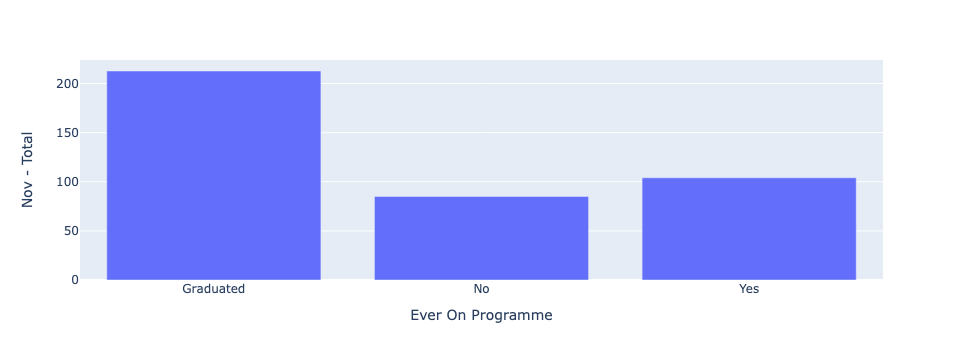

In [6]:
df = all_Primary_all.groupby('Ever On Programme')['Nov - Total'].mean().reset_index()

px.bar(df,
       x="Ever On Programme",
       y="Nov - Total"
)

### 2022 Total Scores

Text(0.5, 1.0, 'Primary School Scores for Children on Programme')

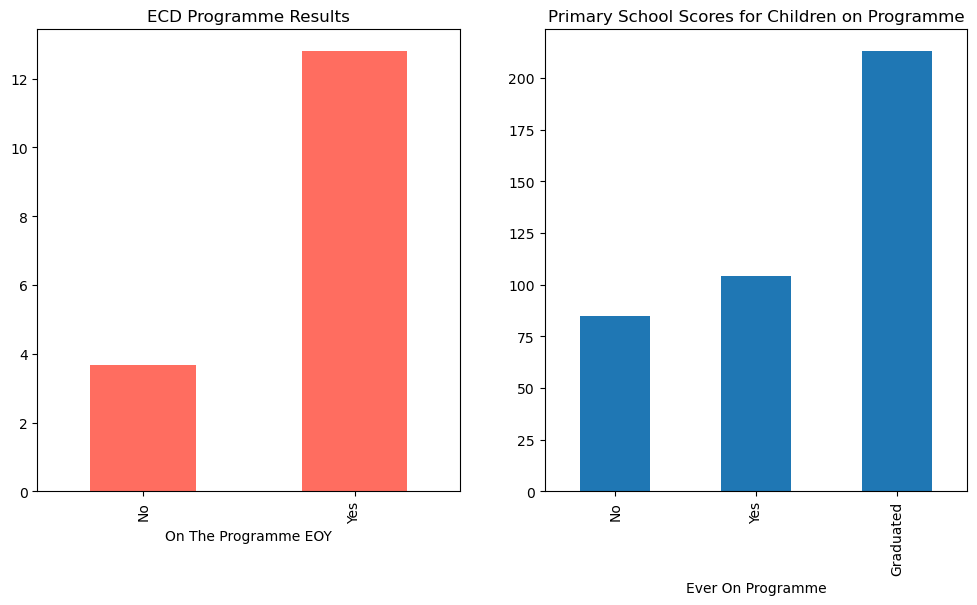

In [10]:
# The following recaptures all primary, but includes previous grads
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("ECD Programme Results")
plt.xlabel("Children On The Programme")
all_ECD.groupby("On The Programme EOY")["Nov - Total"].mean().plot(kind="bar", color=ECD_colour)
plt.subplot(1,2,2)
All_Primary_Agg = children[children['Grade'] != "PreR"]
All_Primary_Agg.groupby("Ever On Programme")["Nov - Total"].mean().sort_values().plot(kind="bar")
plt.title("Primary School Scores for Children on Programme")

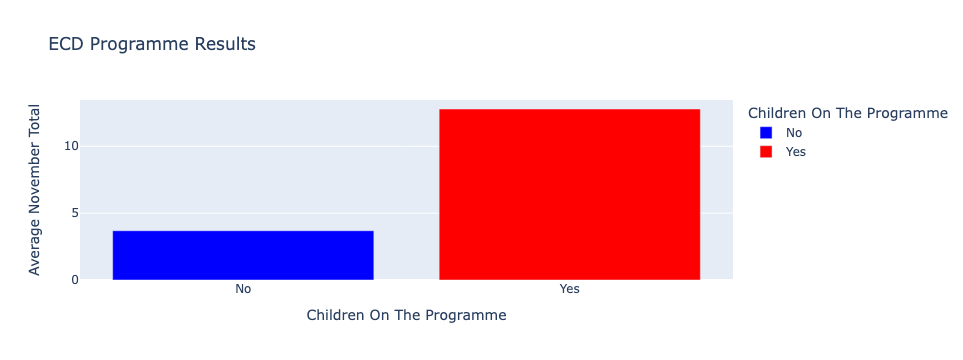

In [8]:
import plotly.express as px

# Create a DataFrame for the averaged data
avg_data = all_ECD.groupby("On The Programme EOY", as_index=False)["Nov - Total"].mean()
# I could have used avg_data below, but just wanted to confirm that if I put it in parenthesis, it would still work and act as a variable.
fig = px.bar(
    (all_ECD.groupby("On The Programme EOY", as_index=False)["Nov - Total"].mean()),
    x="On The Programme EOY",
    y="Nov - Total",
    labels={"On The Programme EOY": "Children On The Programme", "Nov - Total": "Average November Total"},
    title="ECD Programme Results",
    color="On The Programme EOY",
    color_discrete_sequence=["blue", "red"]
)

fig.show()


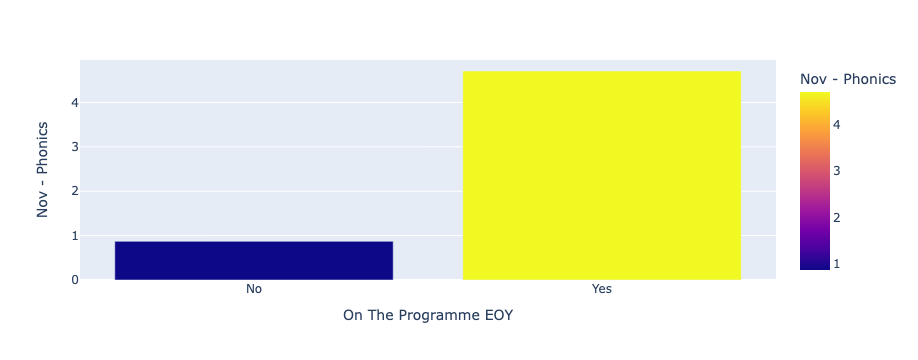

In [21]:
df = all_ECD.groupby("On The Programme EOY")["Nov - Phonics"].mean().reset_index()

fig = px.bar(df, x='On The Programme EOY', y='Nov - Phonics', color='Nov - Phonics')

fig.show()


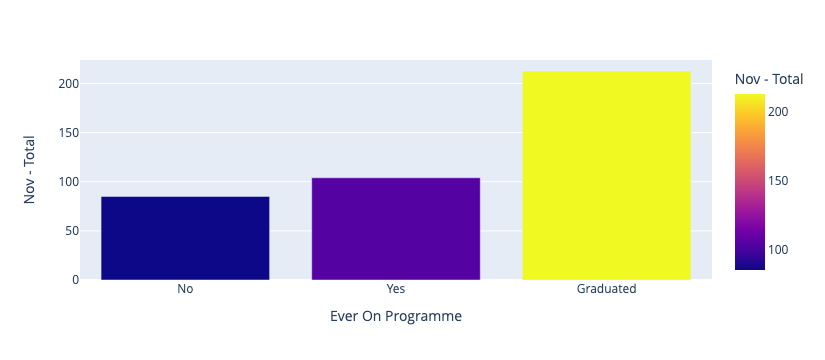

In [22]:
All_Primary_Agg = children[children['Grade'] != "PreR"]
df = All_Primary_Agg.groupby("Ever On Programme")["Nov - Total"].mean().reset_index().sort_values(by='Nov - Total')

fig = px.bar(df, x='Ever On Programme', y='Nov - Total', color='Nov - Total')

fig.show()


### 2022 Improvement Results

<Axes: title={'center': 'Primary School Improvement'}, xlabel='On The Programme EOY'>

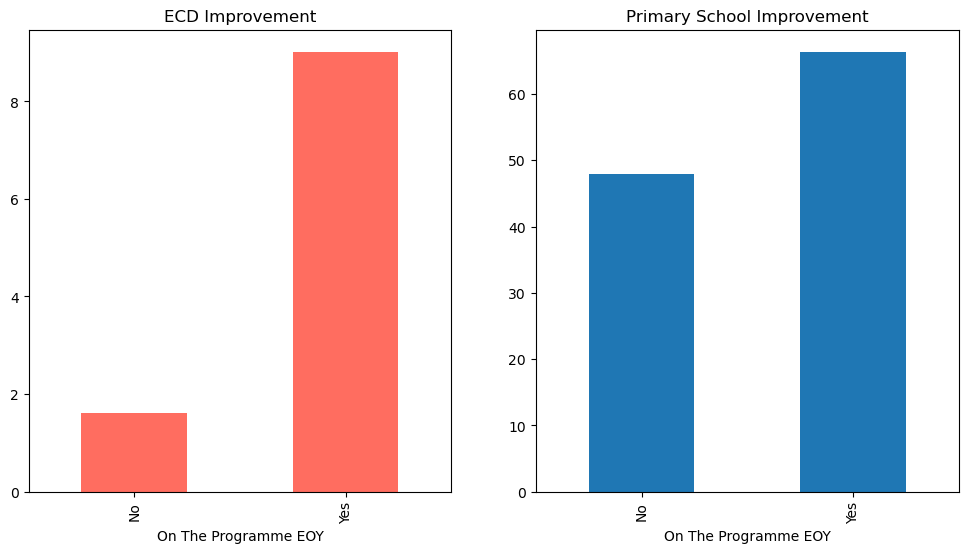

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("ECD Improvement")
plt.xlabel("Children On The Programme")
all_ECD.groupby("On The Programme EOY")["Total Improvement"].mean().plot(kind="bar", color=ECD_colour)
plt.subplot(1,2,2)
plt.title("Primary School Improvement")
plt.xlabel("Children On The Programme")
all_Primary.groupby("On The Programme EOY")["Total Improvement"].mean().plot(kind="bar")

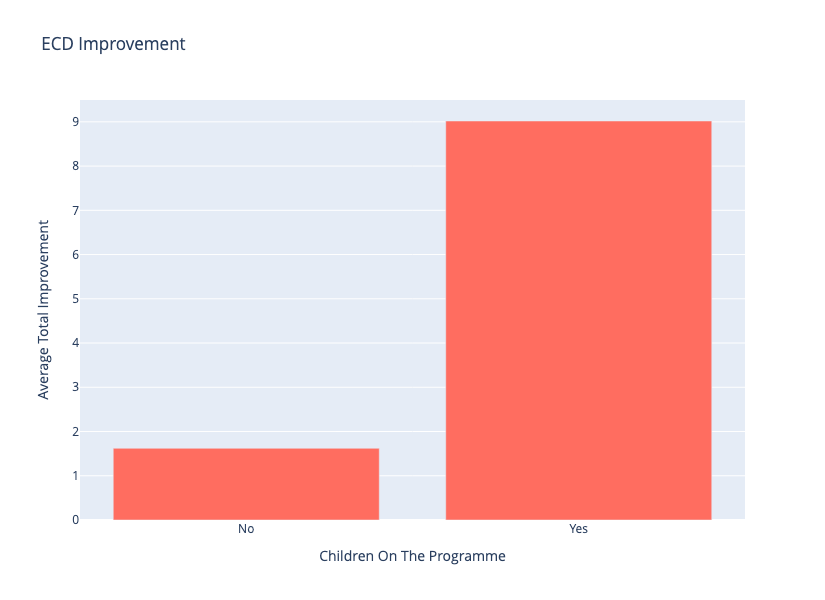

In [24]:
import plotly.graph_objects as go

# Create a DataFrame for the averaged data
avg_data_ECD = all_ECD.groupby("On The Programme EOY", as_index=False)["Total Improvement"].mean()

# Create bar plot
fig = go.Figure(data=go.Bar(
    x=avg_data_ECD["On The Programme EOY"],
    y=avg_data_ECD["Total Improvement"],
    marker_color=ECD_colour))  # assuming ECD_colour is defined

# Update xaxis and yaxis properties
fig.update_xaxes(title_text="Children On The Programme")
fig.update_yaxes(title_text="Average Total Improvement")

# Update title and size
fig.update_layout(title_text="ECD Improvement", height=600, width=900)

fig.show()


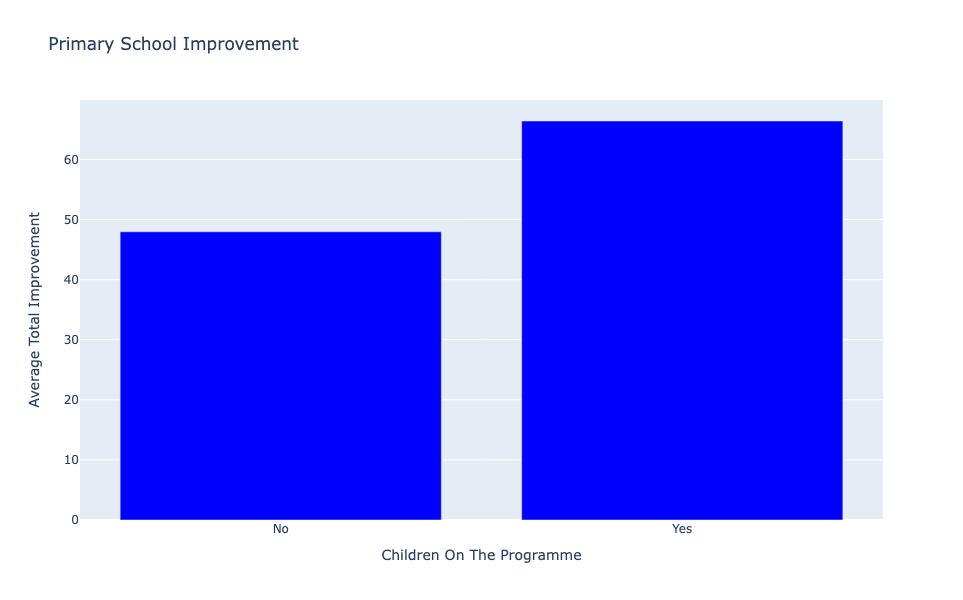

In [25]:
import plotly.graph_objects as go

# Create a DataFrame for the averaged data
avg_data_Primary = all_Primary.groupby("On The Programme EOY", as_index=False)["Total Improvement"].mean()

# Create bar plot
fig = go.Figure(data=go.Bar(
    x=avg_data_Primary["On The Programme EOY"],
    y=avg_data_Primary["Total Improvement"],
    marker_color='blue'))  # using blue color

# Update xaxis and yaxis properties
fig.update_xaxes(title_text="Children On The Programme")
fig.update_yaxes(title_text="Average Total Improvement")

# Update title and size
fig.update_layout(title_text="Primary School Improvement", height=600, width=900)

fig.show()



# Progress of Children on the Programme

/var/folders/l_/by_m7hfx3rb1rg2p44yb7m040000gn/T/ipykernel_98219/2243184670.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




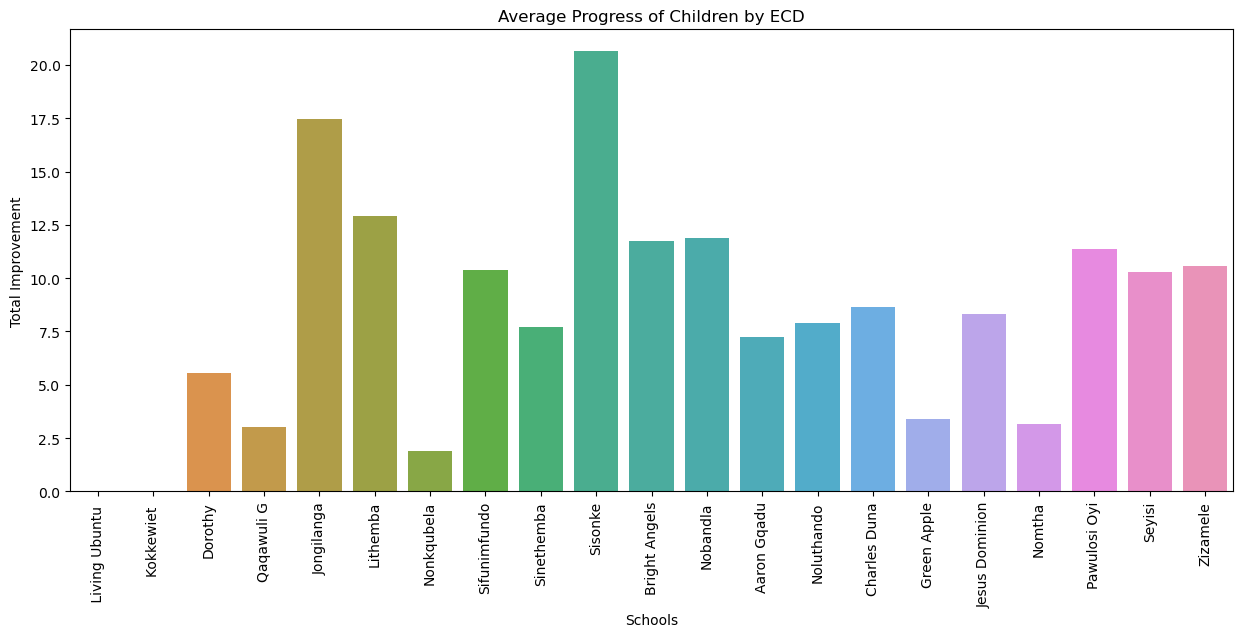

In [26]:
fig, ax = plt.subplots(figsize=(15, 6));

# Using the 'order' parameter to sort the bars based on the sorted_schools
sns.barplot(data=on_programme_ecd, x='Schools', y='Total Improvement', ci=None, ax=ax);
plt.title("Average Progress of Children by ECD");
plt.xticks(rotation=90);

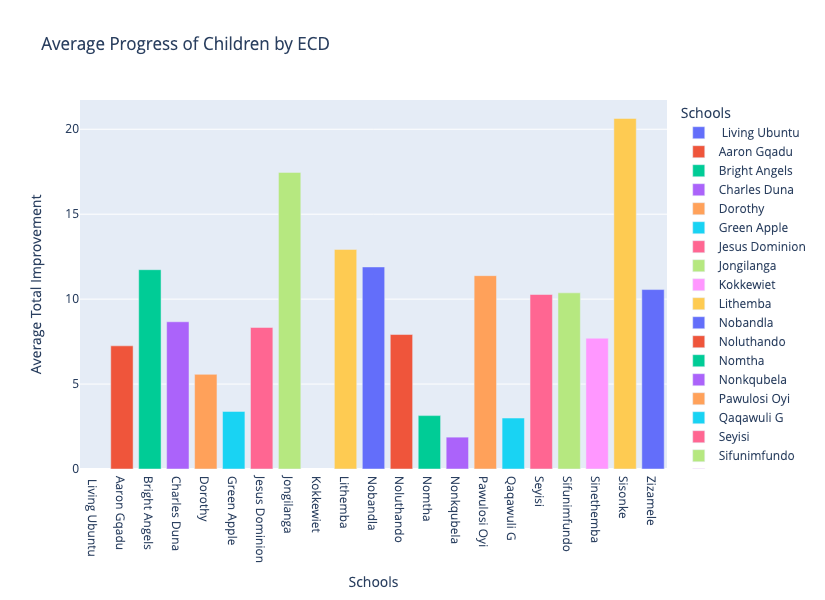

In [27]:
import plotly.express as px

# Calculate the average 'Total Improvement' per 'Schools'
avg_improvement = on_programme_ecd.groupby('Schools', as_index=False)['Total Improvement'].mean()

# Create the bar plot
fig = px.bar(avg_improvement, 
             x="Schools", 
             y="Total Improvement", 
             title="Average Progress of Children by ECD",
            color="Schools")

# Set x-axis title
fig.update_xaxes(title_text="Schools")

# Set y-axis title
fig.update_yaxes(title_text="Average Total Improvement")

# Update layout properties
fig.update_layout(autosize=False, width=900, height=600)

fig.show()



/var/folders/l_/by_m7hfx3rb1rg2p44yb7m040000gn/T/ipykernel_98219/2473445278.py:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




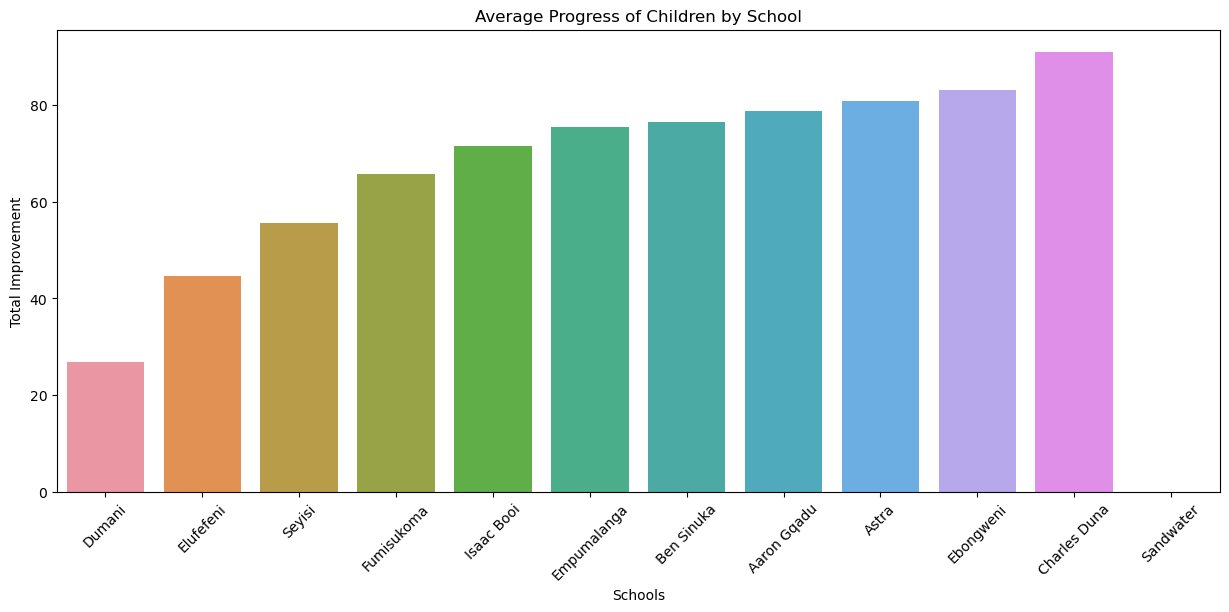

In [28]:
# Create a wide figure with a custom figsize (width, height)
fig, ax = plt.subplots(figsize=(15, 6));

avg_improvement = on_programme_primary.groupby(['Schools'])['Total Improvement'].mean().sort_values().index


# Using the 'order' parameter to sort the bars based on the sorted_schools
sns.barplot(data=on_programme_primary, x='Schools', y='Total Improvement', ci=None, ax=ax, order=avg_improvement);
plt.title("Average Progress of Children by School");
plt.xticks(rotation=45);

# Progress of Children NOT on the programme
### This is an interesting way of comparing schools

/var/folders/l_/by_m7hfx3rb1rg2p44yb7m040000gn/T/ipykernel_98219/1174365865.py:9: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




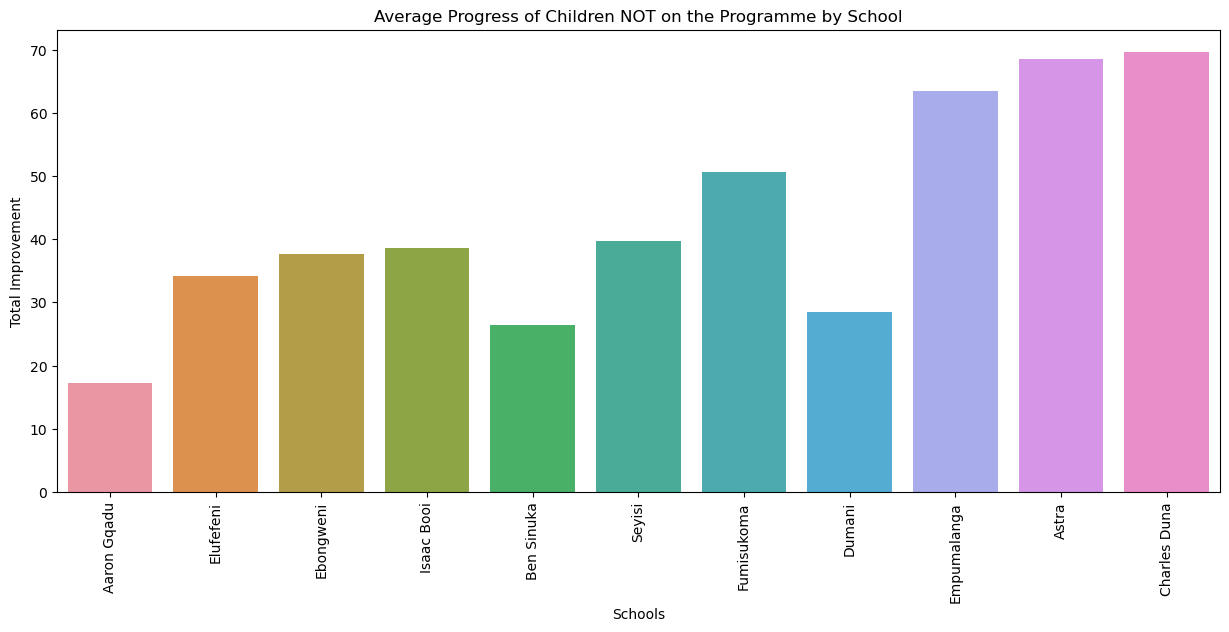

In [29]:
# Calculate the average total improvement for each school based on the 'On The Programme EOY' column
avg_improvement = not_programme_1.groupby(['Schools'])['Total Improvement'].mean().sort_values().index


# Create a wide figure with a custom figsize (width, height)
fig, ax = plt.subplots(figsize=(15, 6))

# Using the 'order' parameter to sort the bars based on the sorted_schools
sns.barplot(data=not_programme_primary, x='Schools', y='Total Improvement', ci=None, ax=ax, order=avg_improvement)
plt.title("Average Progress of Children NOT on the Programme by School")
plt.xticks(rotation=90)
plt.show();

# Effectiveness of Our Programme per School
### This is measuring the gap between growth of kids on and off the programme per school

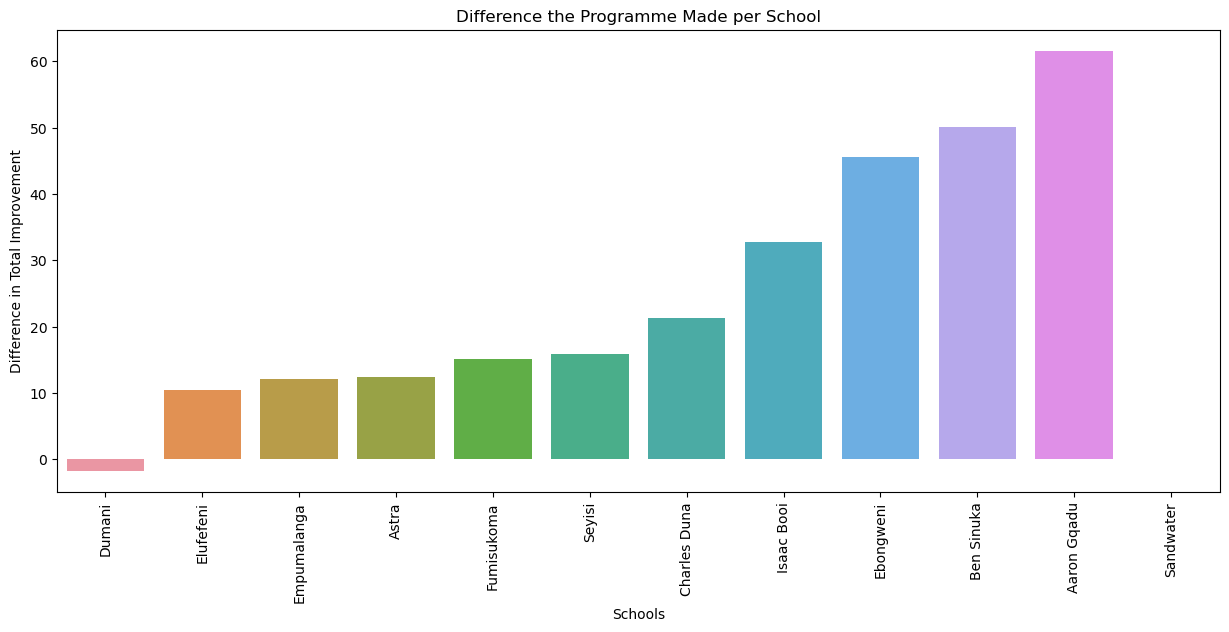

In [30]:
# Calculate the mean 'Total Improvement' per school for each group
on_programme_means = on_programme_primary.groupby('Schools')['Total Improvement'].mean()
not_programme_means = not_programme_primary.groupby('Schools')['Total Improvement'].mean()

# Combine the two resulting DataFrames
combined_means = pd.concat([on_programme_means, not_programme_means], axis=1)
combined_means.columns = ['On Programme', 'Not On Programme']

# Calculate the difference in the mean 'Total Improvement' for each school
combined_means['Difference'] = combined_means['On Programme'] - combined_means['Not On Programme']

# Sort the differences
sorted_differences = combined_means['Difference'].sort_values()

# Create a bar plot of the differences
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=sorted_differences.index, y=sorted_differences.values, ax=ax)
plt.title("Difference the Programme Made per School")
plt.xlabel("Schools")
plt.ylabel("Difference in Total Improvement")
plt.xticks(rotation=90)
plt.show()


### Plotly version

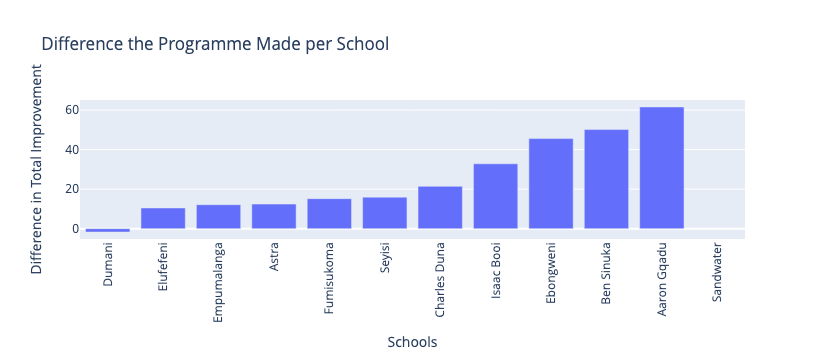

In [32]:


chart_studio.tools.set_credentials_file(username='masinyusane', api_key='kgAp96FOaJl4J0pNYmej')


# Calculate the mean 'Total Improvement' per school for each group
on_programme_means = on_programme_primary.groupby('Schools')['Total Improvement'].mean()
not_programme_means = not_programme_primary.groupby('Schools')['Total Improvement'].mean()

# Combine the two resulting DataFrames
combined_means = pd.concat([on_programme_means, not_programme_means], axis=1)
combined_means.columns = ['On Programme', 'Not On Programme']

# Calculate the difference in the mean 'Total Improvement' for each school
combined_means['Difference'] = combined_means['On Programme'] - combined_means['Not On Programme']

# Sort the differences
sorted_differences = combined_means['Difference'].sort_values()

# Create a bar plot of the differences
fig = go.Figure(go.Bar(x=sorted_differences.index, y=sorted_differences.values))

fig.update_layout(
    title="Difference the Programme Made per School",
    xaxis_title="Schools",
    yaxis_title="Difference in Total Improvement",
    xaxis_tickangle=-90,
)

py.plot(fig, filename='Programme Impact Per School', auto_open=False)

fig.show()


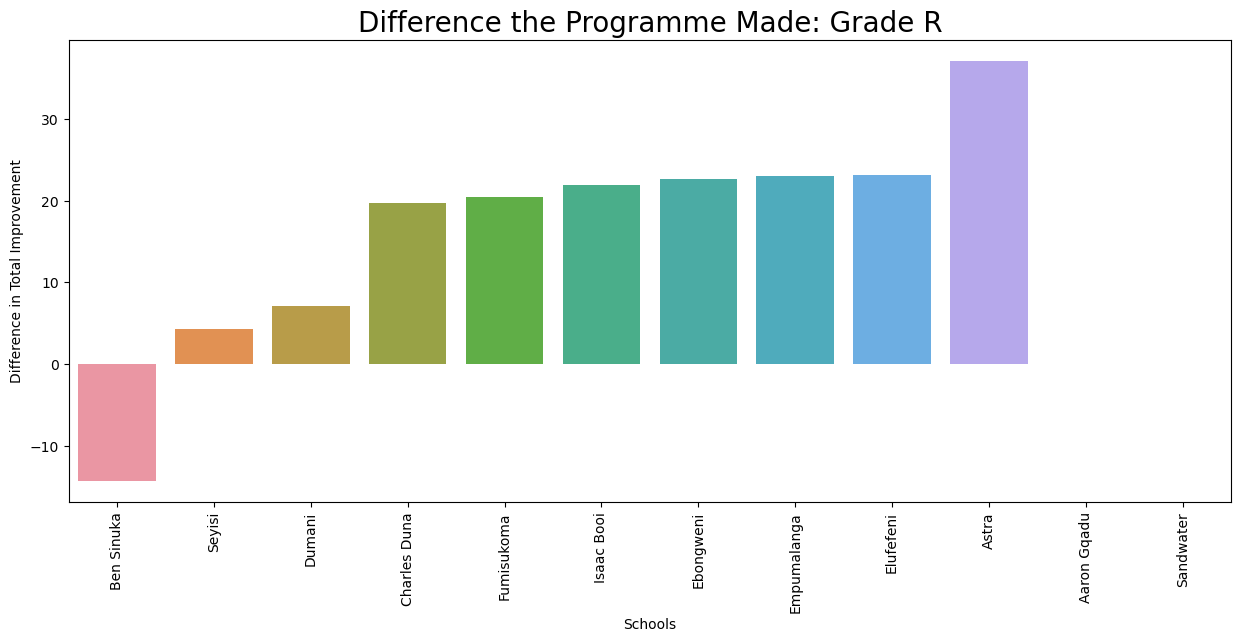

In [33]:



# Calculate the mean 'Total Improvement' per school for each group
on_programme_means = on_R['Total Improvement'].mean()
not_programme_means = not_R['Total Improvement'].mean()

# Combine the two resulting DataFrames
combined_means = pd.concat([on_programme_means, not_programme_means], axis=1)
combined_means.columns = ['On Programme', 'Not On Programme']

# Calculate the difference in the mean 'Total Improvement' for each school
combined_means['Difference'] = combined_means['On Programme'] - combined_means['Not On Programme']

# Sort the differences
sorted_differences = combined_means['Difference'].sort_values()

# Create a bar plot of the differences
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=sorted_differences.index, y=sorted_differences.values, ax=ax)
plt.title("Difference the Programme Made: Grade R", fontsize=20)
plt.xlabel("Schools")
plt.ylabel("Difference in Total Improvement")
plt.xticks(rotation=90)
plt.show()

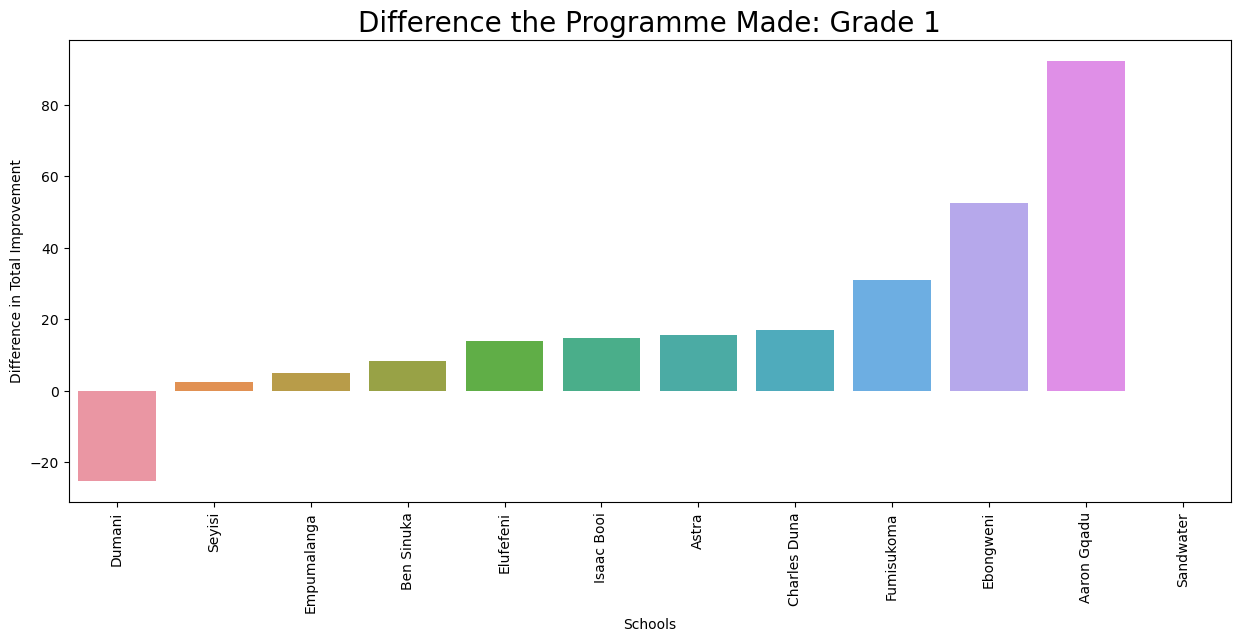

In [34]:
# Calculate the mean 'Total Improvement' per school for each group
on_programme_means = on_1['Total Improvement'].mean()
not_programme_means = not_1['Total Improvement'].mean()

# Combine the two resulting DataFrames
combined_means = pd.concat([on_programme_means, not_programme_means], axis=1)
combined_means.columns = ['On Programme', 'Not On Programme']

# Calculate the difference in the mean 'Total Improvement' for each school
combined_means['Difference'] = combined_means['On Programme'] - combined_means['Not On Programme']

# Sort the differences
sorted_differences = combined_means['Difference'].sort_values()

# Create a bar plot of the differences
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=sorted_differences.index, y=sorted_differences.values, ax=ax)
plt.title("Difference the Programme Made: Grade 1", fontsize=20)
plt.xlabel("Schools")
plt.ylabel("Difference in Total Improvement")
plt.xticks(rotation=90)
plt.show()

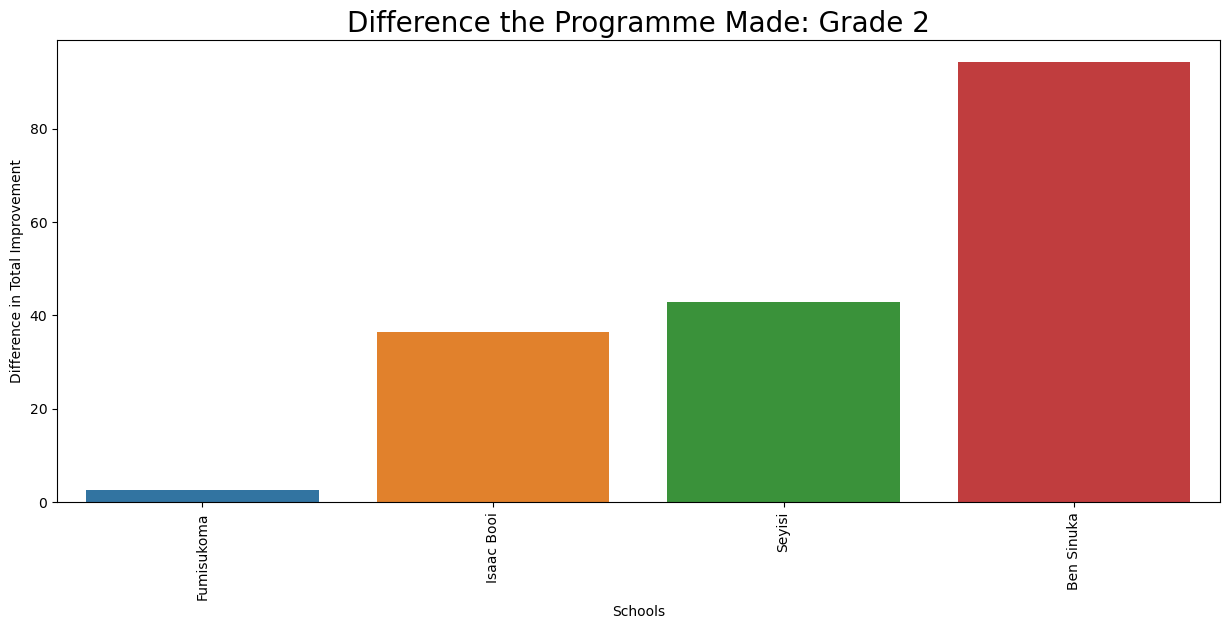

In [35]:
# Calculate the mean 'Total Improvement' per school for each group
on_programme_means = on_2['Total Improvement'].mean()
not_programme_means = not_2['Total Improvement'].mean()

# Combine the two resulting DataFrames
combined_means = pd.concat([on_programme_means, not_programme_means], axis=1)
combined_means.columns = ['On Programme', 'Not On Programme']

# Calculate the difference in the mean 'Total Improvement' for each school
combined_means['Difference'] = combined_means['On Programme'] - combined_means['Not On Programme']

# Sort the differences
sorted_differences = combined_means['Difference'].sort_values()

# Create a bar plot of the differences
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=sorted_differences.index, y=sorted_differences.values, ax=ax)
plt.title("Difference the Programme Made: Grade 2", fontsize=20)
plt.xlabel("Schools")
plt.ylabel("Difference in Total Improvement")
plt.xticks(rotation=90)
plt.show()

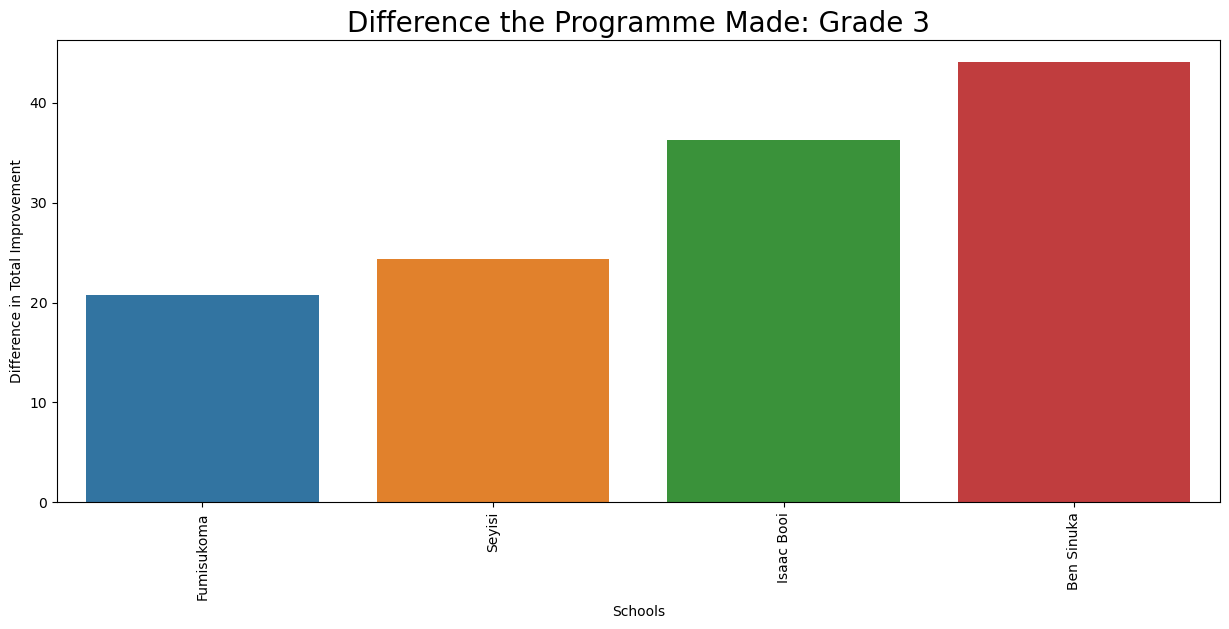

In [36]:
# Calculate the mean 'Total Improvement' per school for each group
on_programme_means = on_3['Total Improvement'].mean()
not_programme_means = not_3['Total Improvement'].mean()

# Combine the two resulting DataFrames
combined_means = pd.concat([on_programme_means, not_programme_means], axis=1)
combined_means.columns = ['On Programme', 'Not On Programme']

# Calculate the difference in the mean 'Total Improvement' for each school
combined_means['Difference'] = combined_means['On Programme'] - combined_means['Not On Programme']

# Sort the differences
sorted_differences = combined_means['Difference'].sort_values()

# Create a bar plot of the differences
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=sorted_differences.index, y=sorted_differences.values, ax=ax)
plt.title("Difference the Programme Made: Grade 3", fontsize=20)
plt.xlabel("Schools")
plt.ylabel("Difference in Total Improvement")
plt.xticks(rotation=90)
plt.show()

# Progress Comparison of Children On vs Off the Programme

/var/folders/l_/by_m7hfx3rb1rg2p44yb7m040000gn/T/ipykernel_98219/1276307106.py:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




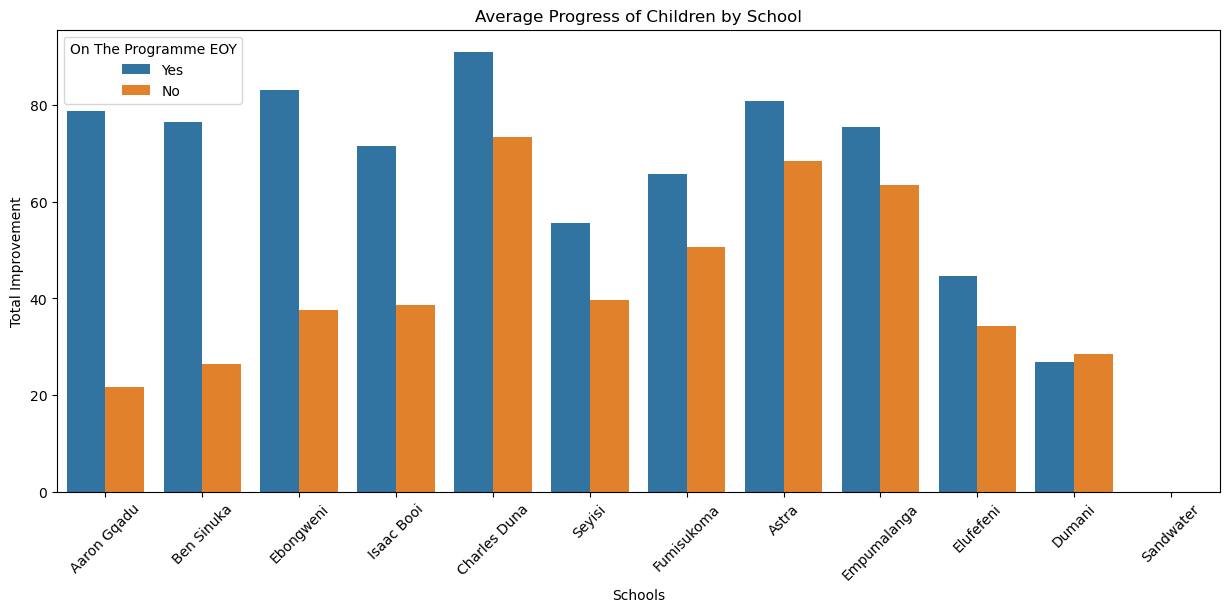

In [37]:
# Calculate the average total improvement for each school based on the 'On The Programme EOY' column
avg_improvement = all_Primary.groupby(['Schools', 'On The Programme EOY'])['Total Improvement'].mean().unstack()

# Calculate the difference between the average values per school of the hue
avg_improvement['difference'] = avg_improvement.max(axis=1) - avg_improvement.min(axis=1)

# Sort the schools by the largest differences
sorted_schools = avg_improvement['difference'].sort_values(ascending=False).index

# Create a wide figure with a custom figsize (width, height)
fig, ax = plt.subplots(figsize=(15, 6))

# Using the 'order' parameter to sort the bars based on the sorted_schools
sns.barplot(data=all_Primary, x='Schools', y='Total Improvement', hue='On The Programme EOY', ci=None, ax=ax, order=sorted_schools)
plt.title("Average Progress of Children by School")
plt.xticks(rotation=45)
plt.show();


# Total Scores per School
### This gives insight into which schools are performing the best by end of Grade 3

/var/folders/l_/by_m7hfx3rb1rg2p44yb7m040000gn/T/ipykernel_98219/531400654.py:11: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




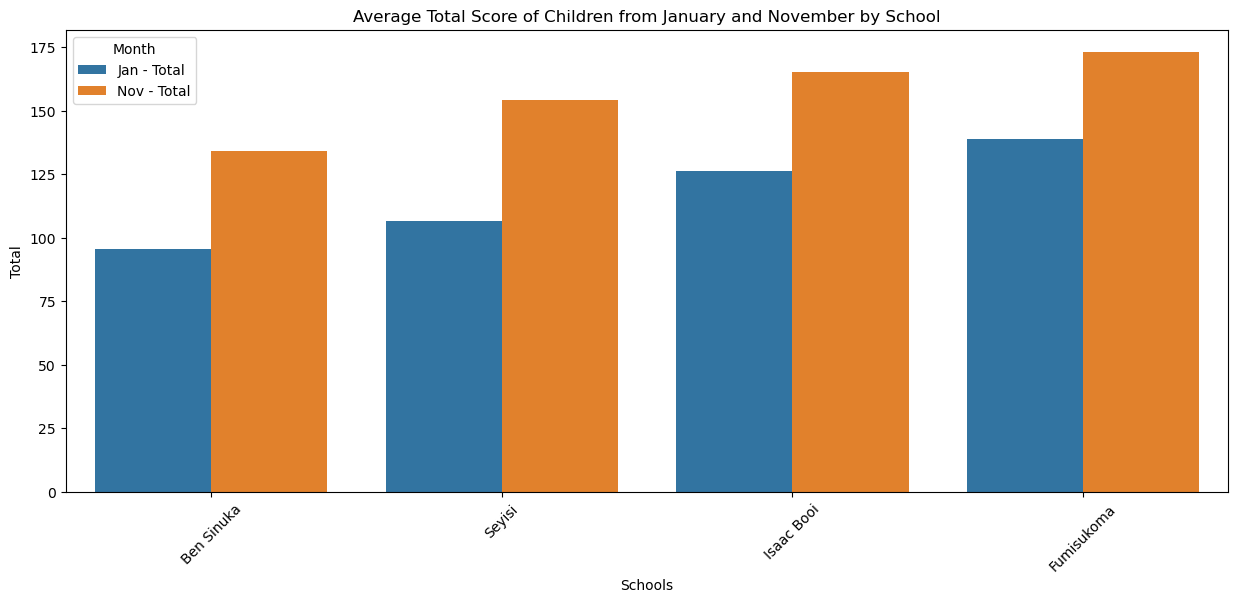

In [38]:
# Reshape the dataframe using the melt function
df_melted = all_3.melt(id_vars=['Schools'], value_vars=['Jan - Total', 'Nov - Total'], var_name='Month', value_name='Total')

# Calculate the average total score for each school in January and November
sorted_schools = df_melted.groupby(['Schools', 'Month'])['Total'].mean().unstack().sort_values(by='Nov - Total').index

# Create a new figure with a custom figsize (width, height)
fig, ax = plt.subplots(figsize=(15, 6))

# Use the 'hue' parameter to differentiate between January and November scores
sns.barplot(data=df_melted, x='Schools', y='Total', hue='Month', ci=None, ax=ax, order=sorted_schools)
plt.title("Average Total Score of Children from January and November by School")
plt.xticks(rotation=45)
plt.show();

/var/folders/l_/by_m7hfx3rb1rg2p44yb7m040000gn/T/ipykernel_99288/3716451273.py:25: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




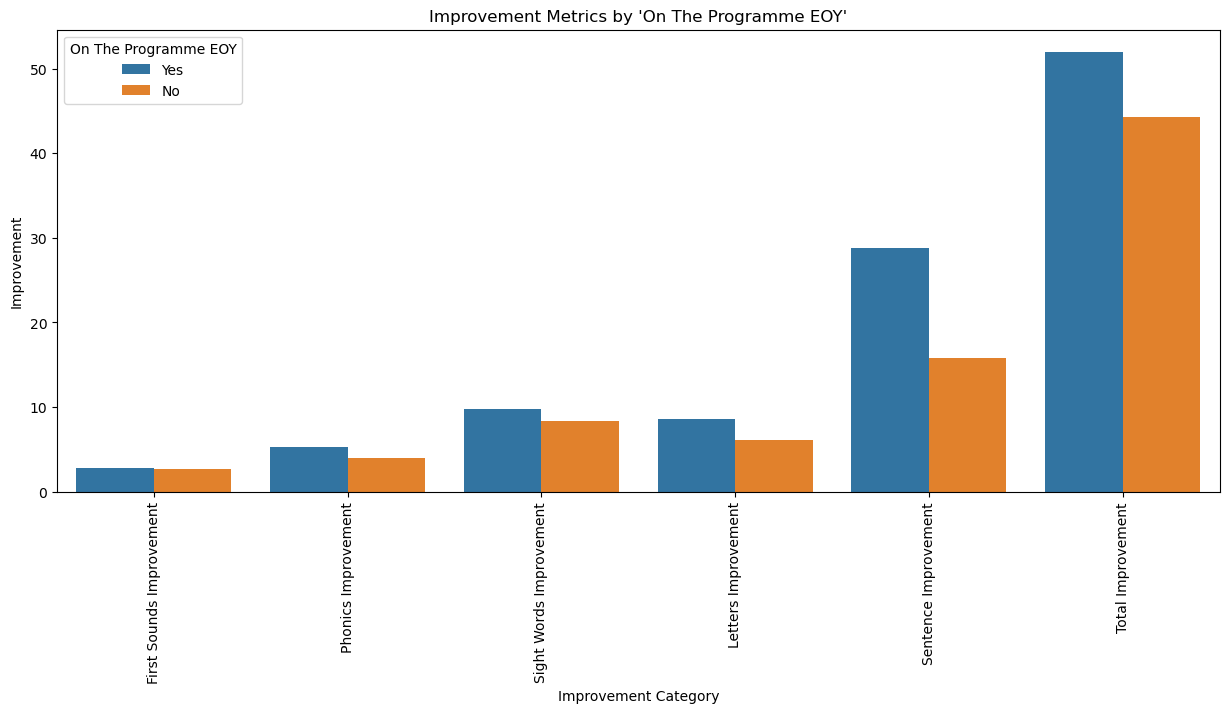

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# List of improvement columns
improvement_columns = [
    "First Sounds Improvement",
    "Phonics Improvement",
    "Sight Words Improvement",
    "Letters Improvement",
    "Sentence Improvement",
    "Total Improvement",
]

# Melt the DataFrame into a long format
long_format = children.melt(
    id_vars=["On The Programme EOY"],
    value_vars=improvement_columns,
    var_name="Improvement Category",
    value_name="Improvement",
)

# Create a bar chart using Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(data=long_format, x="Improvement Category", y="Improvement", hue="On The Programme EOY", ci=None)
plt.title("Improvement Metrics by 'On The Programme EOY'")
plt.xticks(rotation=90)
plt.show()


## Generate PDF per ECDC

In [10]:
# preR_schools = children[children['Grade'] == "PreR"]['Schools'].unique()

# for school in preR_schools:
#     school_data = long_format[(long_format["Schools"] == school) & (long_format["Grade"] == "PreR")].copy()
    
#     with PdfPages(f"{school}_performance_metrics.pdf") as pdf:
#         fig, ax = plt.subplots(figsize=(6, 4))
#         fig.suptitle(f"Improvement Metrics for {school}", fontsize=16)
#         sns.barplot(data=school_data, x="Improvement Category", y="Improvement", hue="On The Programme EOY",hue_order=["No", "Yes"], ci=None, ax=ax, palette=palette)
#         ax.set_xlabel("Improvement Category")
#         ax.set_ylabel("Improvement")
#         ax.tick_params(axis="x", rotation=45)
#         plt.tight_layout()
#         plt.subplots_adjust(top=0.85)
#         pdf.savefig(fig, bbox_inches='tight')
#         plt.close()


KeyError: 'Schools'

## Generate PDFs per School

In [ ]:
# other_grades_schools = children[children['Grade'] != "PreR"]['Schools'].unique()

# for school in other_grades_schools:
#     school_data = long_format[(long_format["Schools"] == school) & (long_format["Grade"] != "PreR")].copy()
    
#     with PdfPages(f"{school}_performance_metrics.pdf") as pdf:
#         fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12), sharey=True)
#         fig.suptitle(f"Improvement Metrics per Grade for {school}", fontsize=16)

#         axes = axes.flatten()
#         other_grades = school_data["Grade"].unique()

#         for grade, ax in zip(other_grades, axes):
#             grade_data = school_data[school_data["Grade"] == grade]
#             sns.barplot(data=grade_data, x="Improvement Category", y="Improvement", hue="On The Programme EOY", hue_order=["No", "Yes"], ci=None, ax=ax, palette=palette)
#             ax.set_title(grade)
#             ax.set_xlabel("")
#             ax.set_ylabel("")

#         axes[0].set_ylabel("Improvement")
#         axes[2].set_ylabel("Improvement")

#         fig.text(0.5, 0.04, "Improvement Category", ha="center", fontsize=14)

#         for ax in axes:
#             ax.tick_params(axis="x", rotation=45)

#         plt.tight_layout()
#         plt.subplots_adjust(top=0.9)
#         pdf.savefig(fig, bbox_inches='tight')
#         plt.close()


## Improvement Per Section

/var/folders/l_/by_m7hfx3rb1rg2p44yb7m040000gn/T/ipykernel_99288/2323626644.py:34: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/l_/by_m7hfx3rb1rg2p44yb7m040000gn/T/ipykernel_99288/2323626644.py:34: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/l_/by_m7hfx3rb1rg2p44yb7m040000gn/T/ipykernel_99288/2323626644.py:34: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/l_/by_m7hfx3rb1rg2p44yb7m040000gn/T/ipykernel_99288/2323626644.py:34: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/l_/by_m7hfx3rb1rg2p44yb7m040000gn/T/ipykernel_99288/2323626644.py:34: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




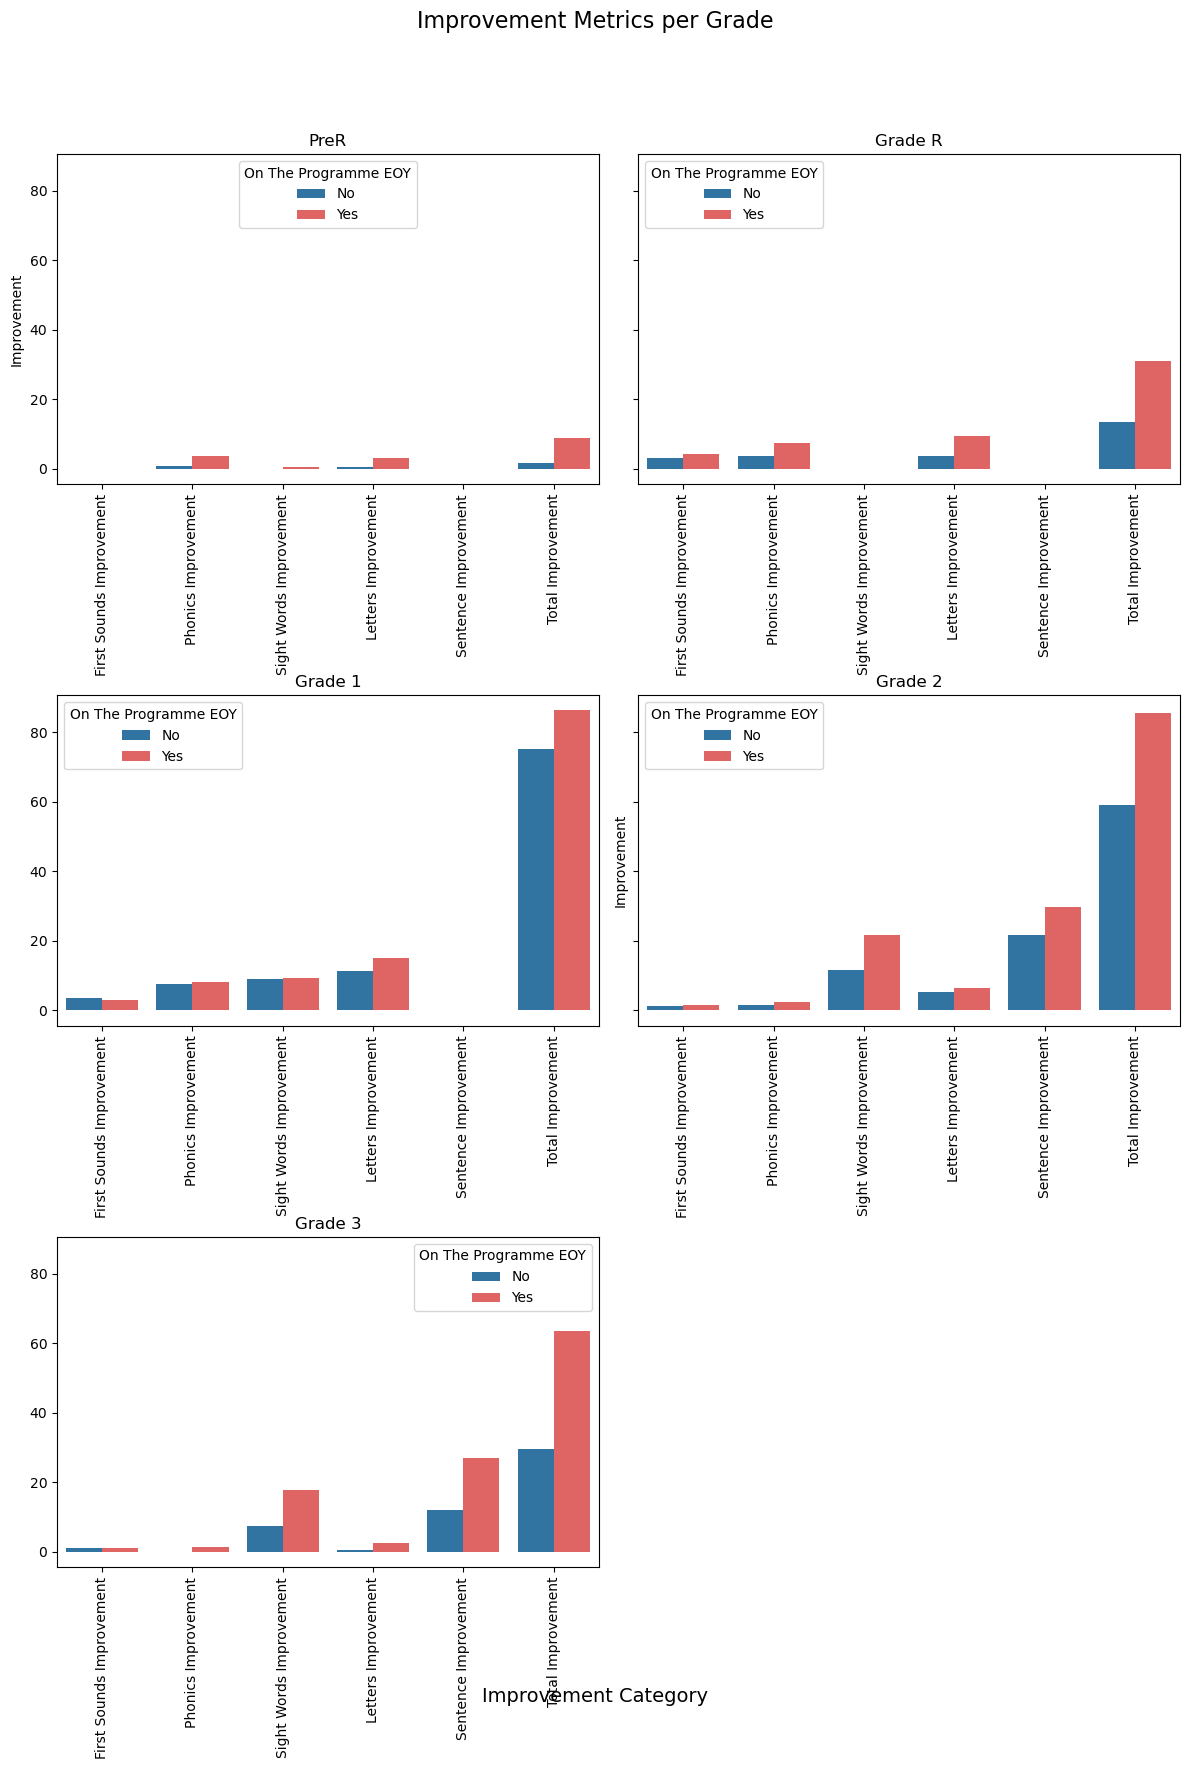

In [11]:
# List of improvement columns
improvement_columns = [
    "First Sounds Improvement",
    "Phonics Improvement",
    "Sight Words Improvement",
    "Letters Improvement",
    "Sentence Improvement",
    "Total Improvement",
]

# Melt the DataFrame into a long format
long_format = children.melt(
    id_vars=["On The Programme EOY", "Grade"],
    value_vars=improvement_columns,
    var_name="Improvement Category",
    value_name="Improvement",
)

grades = ["PreR", "Grade R", "Grade 1", "Grade 2", "Grade 3"]

# Create a subplot grid with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18), sharey=True)
fig.suptitle("Improvement Metrics per Grade", fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()


# Define the custom palette
palette = {"Yes": "#F45050", "No": "C0"}

for grade, ax in zip(grades, axes):
    grade_data = long_format[long_format["Grade"] == grade]
    sns.barplot(data=grade_data, x="Improvement Category", y="Improvement", hue="On The Programme EOY", hue_order=["No","Yes"], ci=None, ax=ax, palette=palette)
    ax.set_title(grade)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Set y-axis label for the first subplot
axes[0].set_ylabel("Improvement")
axes[3].set_ylabel("Improvement")

# Set a common x-axis label for all subplots
fig.text(0.5, 0.04, "Improvement Category", ha="center", fontsize=14)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis="x", rotation=90)

# Remove the last (empty) subplot
axes[-1].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

## Total Scores per School

/var/folders/l_/by_m7hfx3rb1rg2p44yb7m040000gn/T/ipykernel_99288/268420286.py:32: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/l_/by_m7hfx3rb1rg2p44yb7m040000gn/T/ipykernel_99288/268420286.py:32: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/l_/by_m7hfx3rb1rg2p44yb7m040000gn/T/ipykernel_99288/268420286.py:32: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/l_/by_m7hfx3rb1rg2p44yb7m040000gn/T/ipykernel_99288/268420286.py:32: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/l_/by_m7hfx3rb1rg2p44yb7m040000gn/T/ipykernel_99288/268420286.py:32: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




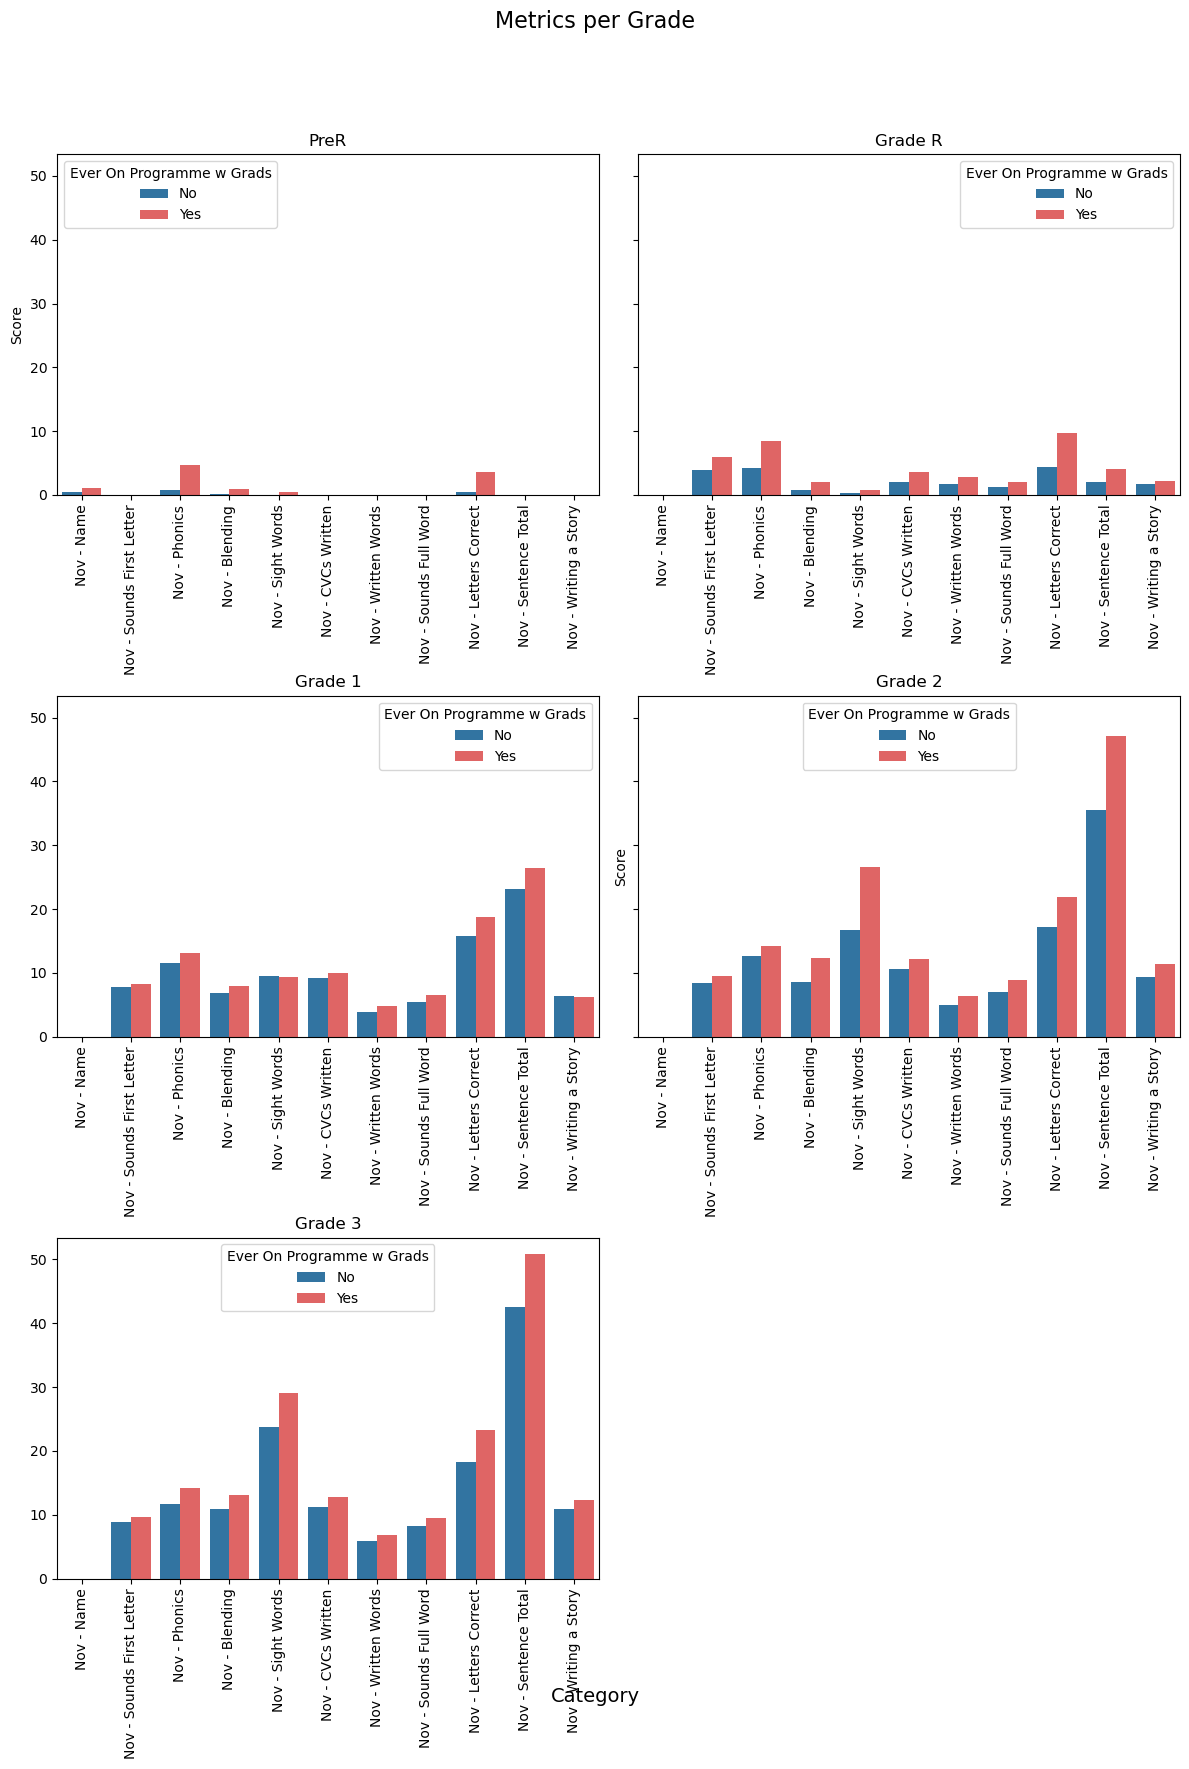

In [12]:
# List of total columns
total_columns = ['Nov - Name', 'Nov - Sounds First Letter',
       'Nov - Phonics', 'Nov - Blending', 'Nov - Sight Words',
       'Nov - CVCs Written', 'Nov - Written Words', 'Nov - Sounds Full Word',
       'Nov - Letters Correct', 'Nov - Sentence Total',
       'Nov - Writing a Story',
]

# Melt the DataFrame into a long format
long_format = children.melt(
    id_vars=["Ever On Programme w Grads", "Grade"],
    value_vars=total_columns,
    var_name="Category",
    value_name="Total Score",
)

grades = ["PreR", "Grade R", "Grade 1", "Grade 2", "Grade 3"]

# Create a subplot grid with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18), sharey=True)
fig.suptitle("Metrics per Grade", fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()


# Define the custom palette
palette = {"Yes": "#F45050", "No": "C0"}

for grade, ax in zip(grades, axes):
    grade_data = long_format[long_format["Grade"] == grade]
    sns.barplot(data=grade_data, x="Category", y="Total Score", hue="Ever On Programme w Grads", hue_order=["No","Yes"], ci=None, ax=ax, palette=palette)
    ax.set_title(grade)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Set y-axis label for the first subplot
axes[0].set_ylabel("Score")
axes[3].set_ylabel("Score")

# Set a common x-axis label for all subplots
fig.text(0.5, 0.04, "Category", ha="center", fontsize=14)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis="x", rotation=90)

# Remove the last (empty) subplot
axes[-1].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Metrics per Grade

In [ ]:
# List of total columns
total_columns = ['Nov - Name', 'Nov - Sounds First Letter',
       'Nov - Phonics', 'Nov - Letters Correct', 'Nov - Blending', 'Nov - Sight Words',
       'Nov - CVCs Written', 'Nov - Written Words', 'Nov - Sounds Full Word',
        'Nov - Sentence Total',
       'Nov - Writing a Story',
]

# Melt the DataFrame into a long format
long_format = children.melt(
    id_vars=["Ever On Programme w Grads", "Grade"],
    value_vars=total_columns,
    var_name="Category",
    value_name="Total Score",
)

grades = ["PreR", "Grade R"]

# Create a subplot grid with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
fig.suptitle("Metrics per Grade", fontsize=16)

# Define the custom palette
palette = {"Yes": "#F45050", "No": "C0"}

for grade, ax in zip(grades, axes):
    grade_data = long_format[long_format["Grade"] == grade]
    sns.barplot(data=grade_data, x="Category", y="Total Score", hue="Ever On Programme w Grads", hue_order=["No","Yes"], ci=None, ax=ax, palette=palette)
    ax.set_title(grade)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Set y-axis label for the first subplot
axes[0].set_ylabel("Score")

# Set a common x-axis label for all subplots
fig.text(0.5, 0.04, "Category", ha="center", fontsize=14)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis="x", rotation=(90))

plt.tight_layout()
plt.subplots_adjust(top=0.9)


In [ ]:
# List of total columns
total_columns = ['Nov - Name', 'Nov - Sounds First Letter',
       'Nov - Phonics', 'Nov - Letters Correct','Nov - Blending', 'Nov - Sight Words',
       'Nov - CVCs Written', 'Nov - Written Words', 'Nov - Sounds Full Word',
        'Nov - Sentence Total',
       'Nov - Writing a Story',
]

# Melt the DataFrame into a long format
long_format = children.melt(
    id_vars=["Ever On Programme w Grads", "Grade"],
    value_vars=total_columns,
    var_name="Category",
    value_name="Total Score",
)

grades = ["Grade 1", "Grade 2"]

# Create a subplot grid with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
fig.suptitle("Metrics per Grade", fontsize=16)

# Define the custom palette
palette = {"Yes": "#F45050", "No": "C0"}

for grade, ax in zip(grades, axes):
    grade_data = long_format[long_format["Grade"] == grade]
    sns.barplot(data=grade_data, x="Category", y="Total Score", hue="Ever On Programme w Grads", hue_order=["No","Yes"], ci=None, ax=ax, palette=palette)
    ax.set_title(grade)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Set y-axis label for the first subplot
axes[0].set_ylabel("Score")

# Set a common x-axis label for all subplots
fig.text(0.5, 0.04, "Category", ha="center", fontsize=14)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis="x", rotation=80)

plt.tight_layout()
plt.subplots_adjust(top=0.9)


# Sessions vs Performance

In [ ]:
sns.scatterplot(data = on_programme_ecd, x="Total Sessions", y="Nov - Total", hue="Schools")
sns.regplot(data=on_programme_ecd, x="Total Sessions", y="Nov - Total", scatter=False, color='black', line_kws={"linewidth": 1})
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [ ]:
fig = px.scatter(on_programme_ecd, x="Total Sessions", y="Nov - Total", color="Schools")
fig.show()

In [ ]:
px.scatter(
    all_Primary,
    x="Total Sessions",
    y="Nov - Total",
    color="Grade",
    trendline="ols"

)

In [ ]:
px.scatter(
    all_R,
    x="Total Sessions",
    y="Sounds and Phonics Improvement",
    color="full_sessions",
    trendline="ols"

)

In [ ]:
all_ECD['On The Programme'].value_counts()

### Grade R Phonics: Base Case

This is gives a sense of the starting point of children at the different schools. Note the Y-axis, in reality there's very little difference between the children

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Grade R: Base Case Phonics")
GradeR = children[children['Grade'] == "Grade R"]
GR = GradeR.groupby("Schools")
GR['Jan - Phonics'].mean().sort_values().plot(kind="bar", color = GR_colour)
plt.subplot(1,2,2)
plt.title("Grade 1: Base Case Phonics")
Grade1 = children[children['Grade'] == "Grade 1"]
G1 = Grade1.groupby("Schools")
G1['Jan - Phonics'].mean().sort_values().plot(kind="bar", color = G1_colour)

## Standard Deviation Checks
#### Comparing Standard Deviations per Site

Higher standard deviations should be investigated as it's an indicator that the LCs are not taking their children correctly. Note that much higher SDs are to be expected in ECDCs b/c of attendance and parents paying fees.

### Primary School Standard Deviation

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
on_primary['Total Sessions'].std().sort_values().plot(kind="bar")
plt.title("Session Standard Deviation by School")
plt.xlabel("<-----  Good                  Bad  ----->")
plt.subplot(1,2,2)
on_ecd['Total Sessions'].std().sort_values().plot(kind="bar", color=ECD_colour)
plt.title("Session Standard Deviation by ECDC")
plt.xlabel("<-----  Good                  Bad  ----->")

In [ ]:
all_Primary.groupby("LC Name")['Total Sessions'].std().sort_values(ascending=False).head(10)

In [ ]:
all_ECD.groupby("LC Name")['Total Sessions'].std().sort_values(ascending=False).head(10)

## Total Sessions Comparisons

### Primary School Sessions

In [ ]:
on_primary['Total Sessions'].mean().sort_values().plot(kind="bar", color="b")

### ECDC Sesssions

In [ ]:
on_ecd['Total Sessions'].mean().sort_values().plot(kind="bar", color=ECD_colour)

# Comparing Results

## Primary Schools (All Learners - End of Year)

In [ ]:
plt.figure(figsize = (10,10))
ax = plt.subplot(2,2,1)
plt.title("All Grade Rs: Total Score")
all_R.groupby("Schools")['Nov - Total'].mean().sort_values().plot(kind="bar", color = GR_colour)
plt.subplot(2,2,2, sharey = ax)
plt.title("All Grade 1s: Total Score")
all_1.groupby("Schools")['Nov - Total'].mean().sort_values().plot(kind="bar", color = G1_colour)
ax2 = plt.subplot(2,2,3)
plt.tight_layout()
plt.title("All Grade 2s: Total Score")
all_2.groupby("Schools")['Nov - Total'].mean().sort_values().plot(kind="bar", width=0.2, color = G2_colour)
plt.subplot(2,2,4, sharey = ax2)
plt.tight_layout()
plt.title("All Grade 3s: Total Score")
all_2.groupby("Schools")['Nov - Total'].mean().sort_values().plot(kind="bar", width=0.2, color = G3_colour)

## ECD & Grade R: Final Score & Improvement

- The first row shows the final scores. This allows us to compare schools / ECD Centres (at least in terms of what the assessment captures).
- The second row shows total improvement in scores. This allows us to view the 

In [ ]:
plt.figure(figsize=(15,20))
plt.tight_layout()
ax = plt.subplot(2,2,1)
plt.title("ECD Final Score", fontsize = 14)
on_ecd['Nov - Total'].mean().sort_values().plot(kind="bar", color=ECD_colour)
plt.subplot(2,2,2, sharey = ax)
on_R['Nov - Total'].mean().sort_values().plot(kind="bar", color=GR_colour)
plt.title("Grade R Final Score", fontsize = 14)
ax2 = plt.subplot(2,2,3)
plt.tight_layout()
plt.title("ECD Improvement", fontsize = 14)
on_ecd['Total Improvement'].mean().sort_values().plot(kind="bar", alpha = 0.7, color=ECD_colour)
plt.subplot(2,2,4, sharey = ax2)
plt.tight_layout()
on_R['Total Improvement'].mean().sort_values().plot(kind="bar", alpha = 0.7, color=GR_colour)
plt.title("Grade R Improvement", fontsize = 14)

## ECD & Grade R: Phonics Score & Improvement

In [ ]:
plt.figure(figsize=(15,20))
plt.tight_layout()
ax = plt.subplot(2,2,1)
plt.title("ECD Phonics Score", fontsize = 14)
on_ecd['Nov - Phonics'].mean().sort_values().plot(kind="bar", color=ECD_colour)
plt.subplot(2,2,2, sharey = ax)
on_R['Nov - Phonics'].mean().sort_values().plot(kind="bar", color=GR_colour)
plt.title("Grade R Phonics Score", fontsize = 14)
ax2 = plt.subplot(2,2,3)
plt.tight_layout()
plt.title("ECD Phonics Improvement", fontsize = 14)
on_ecd['Phonics Improvement'].mean().sort_values().plot(kind="bar", alpha = 0.7, color=ECD_colour)
plt.subplot(2,2,4, sharey = ax2)
plt.tight_layout()
on_R['Phonics Improvement'].mean().sort_values().plot(kind="bar", alpha = 0.7, color=GR_colour)
plt.title("Grade R Phonics Improvement", fontsize = 14)

In [ ]:
plt.figure(figsize=(15,20))
plt.tight_layout()
ax = plt.subplot(2,2,1)
plt.title("Grade 1 Final Score", fontsize = 14)
on_1['Nov - Total'].mean().sort_values().plot(kind="bar", color=G1_colour)
plt.subplot(2,2,2, sharey = ax)
plt.title("Grade 2 Final Score", fontsize = 14)
on_2['Nov - Total'].mean().sort_values().plot(kind="bar", width=0.3, color=G2_colour)
ax2 = plt.subplot(2,2,3)
plt.tight_layout()
plt.title("Grade 1 Improvement", fontsize = 14)
on_1['Total Improvement'].mean().sort_values().plot(kind="bar", alpha = 0.7, color=G1_colour)
plt.subplot(2,2,4, sharey = ax2)
plt.tight_layout()
on_2['Total Improvement'].mean().sort_values().plot(kind="bar", width = 0.3, alpha = 0.7, color=G2_colour)
plt.title("Grade 2 Improvement", fontsize = 14)

## Grade R & 1 Phonics Improvement

In [ ]:
plt.figure(figsize=(10,10))
ax = plt.subplot(2,2,1)
plt.title("Grade R Phonics Improvement")
on_R['Phonics Improvement'].mean().sort_values().plot(kind="bar", color=GR_colour)
plt.subplot(2,2,2, sharey = ax)
plt.title("Grade 1 Phonics Improvement")
on_1['Phonics Improvement'].mean().sort_values().plot(kind="bar", color=G1_colour)

## Grade 2 & 3 Total Improvement

In [ ]:
plt.figure(figsize=(10,10))
ax = plt.subplot(2,2,1)
plt.title("Grade 2 Total Improvement")
on_2['Total Improvement'].mean().sort_values().plot(kind="bar", color=G2_colour)
plt.subplot(2,2,2, sharey=ax)
plt.title("Grade 3 Total Improvement")
on_3['Total Improvement'].mean().sort_values().plot(kind="bar", color=G3_colour)

# Underperforming Children
#### The list below is grabbing children with progress < 10 that are in primary school

In [ ]:
underperforming_primary = children[(children['Total Improvement'] < 10) & (children['Total Sessions'] > 10) & (children['Nov - Total'] > 0) & (children['Grade'] != "PreR")]
underperforming_list = underperforming_primary[["Schools", "Class", "LC Name", "Surname & Name","Total Sessions", "Nov - Total", "Total Improvement"]]
pd.set_option('display.max_rows', 100)
underperforming_list.sort_values("LC Name")

### LCs with multiple children that are underperforming.

In [ ]:
underperforming_list[['LC Name', 'Schools']].value_counts().head(20)

### Schools with the most underperforming children

In [ ]:
underperforming_list['Schools'].value_counts().sort_values(ascending=False)

## Most Improved Children on Programme

In [ ]:
on_programme_primary[['Mcode', 'Schools','Grade','Surname & Name','Ever On Programme','Jan - Total', 'Nov - Total','Total Improvement']].sort_values(by='Total Improvement',ascending=False).head(20)

## Results per Big 4 Per Grade

In [ ]:
all_four = ["Ben Sinuka", "Seyisi", "Fumisukoma", "Isaac Booi"]
df_all_four = children[(children['Schools'].isin(all_four)) & (children['Ever On Programme'] != "Graduated")]
df_all_four.groupby(["Schools", "Grade", "On The Programme EOY"])[improvement_columns].mean().unstack()

### Charting Total Scores per Grade

In [ ]:
plt.figure(figsize=(50,50))
all_four = ["Ben Sinuka", "Seyisi", "Fumisukoma", "Isaac Booi"]
df_all_four = children[children['Schools'].isin(all_four)]
df_all_four.groupby(["Schools", "Grade"])["Nov - Total"].mean().unstack().plot(kind="bar")

# GPT Prompts

In [ ]:
avg_scores = children.groupby('Schools')[['Jan - Phonics', 'Nov - Phonics']].mean().reset_index()
sns.set_theme()
sns.set(style="whitegrid")

In [ ]:
num_schools = len(avg_scores['Schools'])
num_schools

In [ ]:
# Calculate the number of schools
num_schools = len(avg_scores['Schools'])

# Create the subplots
fig, axes = plt.subplots(nrows=num_schools, ncols=1, figsize=(6, 4 * num_schools), sharex=True, sharey=True)

# Iterate through the schools and create a bar chart for each
for i, school in enumerate(avg_scores['Schools']):
    ax = axes[i]
    school_data = avg_scores[avg_scores['Schools'] == school]
    
    sns.barplot(data=school_data, x='Schools', y='Jan - Phonics', color='b', label='Jan-Phonics', ax=ax)
    sns.barplot(data=school_data, x='Schools', y='Nov - Phonics', color='g', label='Nov-Phonics', ax=ax)

    # Customize the chart
    ax.set_ylabel("Average Phonics Score")
    ax.set_title(f"Average Jan-Phonics and Nov-Phonics Scores for {school}")
    ax.legend()

# Adjust spacing between subplots and set a common x-axis label
fig.subplots_adjust(hspace=0.4)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("School")

In [ ]:
import numpy as np

sns.set(style="whitegrid")

# Calculate the number of schools
num_schools = len(avg_scores['Schools'])

# Create the subplots
fig, axes = plt.subplots(nrows=num_schools, ncols=1, figsize=(6, 4 * num_schools), sharex=True, sharey=True)

# Define bar width
bar_width = 0.35

# Iterate through the schools and create a bar chart for each
for i, school in enumerate(avg_scores['Schools']):
    ax = axes[i]
    school_data = avg_scores[avg_scores['Schools'] == school]

    # Create a bar chart with bars side by side
    jan_scores = school_data['Jan - Phonics']
    nov_scores = school_data['Nov - Phonics']

    index = np.arange(len(school_data))
    
    ax.bar(index, jan_scores, bar_width, label='Jan-Phonics', color='b')
    ax.bar(index + bar_width, nov_scores, bar_width, label='Nov-Phonics', color='g')

    # Customize the chart
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(school_data['Schools'])
    ax.set_ylabel("Average Phonics Score")
    ax.set_title(f"Average Jan-Phonics and Nov-Phonics Scores for {school}")
    ax.legend()

# Adjust spacing between subplots and set a common x-axis label
fig.subplots_adjust(hspace=0.4)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

# Define bar width
bar_width = 0.35

# Create a PDF file to save the charts
with PdfPages("phonics_scores_by_school.pdf") as pdf:
    # Iterate through the schools and create a bar chart for each
    for i, school in enumerate(avg_scores['Schools']):
        # Create the subplots
        fig, ax = plt.subplots(figsize=(6, 4), sharex=True, sharey=True)

        school_data = avg_scores[avg_scores['Schools'] == school]

        # Create a bar chart with bars side by side
        jan_scores = school_data['Jan - Phonics']
        nov_scores = school_data['Nov - Phonics']

        index = np.arange(len(school_data))
        
        ax.bar(index, jan_scores, bar_width, label='Jan-Phonics', color='b')
        ax.bar(index + bar_width, nov_scores, bar_width, label='Nov-Phonics', color='g')

        # Customize the chart
        ax.set_xticks(index + bar_width / 2)
        ax.set_xticklabels(school_data['Schools'])
        ax.set_ylabel("Average Phonics Score")
        ax.set_title(f"Average Jan-Phonics and Nov-Phonics Scores for {school}")
        ax.legend()

        # Save the chart to the PDF
        pdf.savefig(fig)
        plt.close(fig)

print("The PDF file has been created.")


#### Group By Practice
- Creating a group_by object by school
- isolating Seyisi using get_group
- isolating Seyisi Grade 1 using filtering
- getting some basic stats on Seyisi Grade 1 using describe

In [ ]:
sites = children.groupby("Schools")
seyisi = sites.get_group("Seyisi")
seyisi_g1 = seyisi[seyisi["Grade"] == "Grade 1"]
seyisi_g1.describe()

## Group Bys - Multi Columns

In [ ]:
on_primary_by_grade = on_programme_primary.groupby(["Schools","Grade"])
on_primary_by_grade['Nov - Phonics'].mean()

# List of ideas / double-checks

## Ideas
- hierarchy of schools & then grades for stats
- Run session standard deviations per LC & per grade. Isolate worst offenders to follow up on.
- Compare performance metrics per LC. Not just phonics, but also things like sight words as this will let us see who's (potentially) not doing sight word practice.
- A scatter plot comparing number of sessions with improvement.


## Double-Checks / Fixes
- Children 'On The Programme' w/ an 'LC' but zero sessions
- The 'On The Programme' flag for children that left in the middle of the year (this throws off stats like Sessions STD)
- Set improvements to zero if we didn't do end of year assessments (eg Sandwater)

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.ylabel("score")
plt.xlabel("sessions")
plt.title("ECD - Sessions vs Score")
sessions = on_programme_ecd['Total Sessions']
score = on_programme_ecd['Nov - Total']
plt.scatter(sessions, score)
plt.subplot(1,2,2)
plt.title("G1 - Sessions vs Score")
plt.ylabel("score")
plt.xlabel("sessions")
sessions = on_programme_1['Total Sessions']
score = on_programme_1['Nov - Total']
plt.scatter(sessions, score)

In [ ]:
df_jan = children[['Mcode', 'Schools', 'Centre Type', 'Class', 'Teacher', 'Grade', 'Hub',
       'Surname & Name', 'True Zero Check', 'Ever On Programme',
       'On The Programme', 'On The Programme EOY', 'Pairing Number', 'LC Name',
       'Start Date', 'Total Sessions', 'Jan - Pencil handling',
       'Jan - Picture', 'Jan - Name', 'Jan - Sounds First Letter',
       'Jan - Phonics', 'Jan - Blending', 'Jan - Sight Words',
       'Jan - CVCs Written', 'Jan - Written Words', 'Jan - Sounds Full Word',
       'Jan - Letters Correct', 'Jan - Sentence 1', 'Jan - Sentence 2',
       'Jan - Writing a Story', 'Jan - Total', 'Jan - Total Score %']]

In [ ]:
df_jan["Total"] = df_jan["Jan = Total"]

In [ ]:
df_june = children[['Mcode', 'Schools', 'Centre Type', 'Class', 'Teacher', 'Grade', 'Hub',
       'Surname & Name', 'True Zero Check', 'Ever On Programme',
       'On The Programme', 'On The Programme EOY', 'Pairing Number', 'LC Name',
       'Start Date', 'Total Sessions', 'Jun - Pencil handling',
       'Jun - Picture', 'Jun - Name', 'Jun - Sounds First Letter',
       'Jun - Phonics', 'Jun - Blending', 'Jun - Sight Words',
       'Jun - CVCs Written', 'Jun - Written Words', 'Jun - Sounds Full Word',
       'Jun -  Letters Correct (8/29pts)', 'Jun - Sentence 1', 'Jun - Sentence 2',
       'Jun - Writing a Story', 'Jun - Total', 'Jun - Total Score %']]

In [ ]:
df_nov = children[['Mcode', 'Schools', 'Centre Type', 'Class', 'Teacher', 'Grade', 'Hub',
       'Surname & Name', 'True Zero Check', 'Ever On Programme',
       'On The Programme', 'On The Programme EOY', 'Pairing Number', 'LC Name',
       'Start Date', 'Total Sessions', 'Nov - Pencil handling',
       'Nov - Picture', 'Nov - Name', 'Nov - Sounds First Letter',
       'Nov - Phonics', 'Nov - Blending', 'Nov - Sight Words',
       'Nov - CVCs Written', 'Nov - Written Words', 'Nov - Sounds Full Word', 'Nov - Sentence 1', 'Nov - Sentence 2',
       'Nov - Writing a Story', 'Nov - Total', 'Nov - Total Score %']]

In [ ]:
df_nov["Assess Date"] == '11/1/2022'

In [ ]:
frames = [df_jan, df_june, df_nov]

In [ ]:
sns.lineplot(data=frames, x="Assess Date", y="Tota")

In [ ]:
sns.displot(kind="hist", data=children, x="Nov - Total", col = "Grade", row="Ever On Programme w Grads")